# <font color='blue'>AutoML em Python</font>
# <font color='blue'>Machine Learning</font>

## Processo Tradicional de Machine Learning - Parte 1 - Modelos de Regressão e Classificação Simples

## Fonte de Dados

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q watermark

In [2]:
!pip install pydotplus

     ------------------------------------ 278.7/278.7 kB 490.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=c019daf8d73f9e967df2ef96d651b3a338feae981ef69313d102e62f60e10889
  Stored in directory: c:\users\autologon\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [3]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=e006602909488d098bca7eab182f809fdec5ca0f7d074737713154d61f0ab068
  Stored in directory: c:\users\autologon\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [5]:
# Imports
import pydotplus  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import sklearn.tree as tree
from six import StringIO
from sklearn.datasets import fetch_california_housing #Dataset de preco de casas na california
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Quantidade de fluxos que ele irá gerar
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error  #Verificar métricas
from IPython.display import Image  #Mostrar os dados
%matplotlib inline

In [6]:
!pip install watermark

In [7]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Ricardo Roberto de Lima" --iversions

Author: Ricardo Roberto de Lima

seaborn   : 0.11.2
matplotlib: 3.5.2
pandas    : 1.4.4
pydotplus : 2.0.2
sklearn   : 0.0.post1
numpy     : 1.21.5



## Carga e Exploração dos Dados

In [29]:
# Carrega os dados
dataset = fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [11]:
# Elementos dos dados
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [12]:
# Converte em dataframe
dados = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [13]:
# Extrai a variável target
target = pd.Series(dataset.target, name = 'MedPrice')

In [14]:
# Shape
dados.shape

(20640, 8)

In [15]:
# Tipos de dados
dados.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [16]:
# Visualiza
dados.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
# Resumo estatístico
pd.options.display.float_format = '{:,.2f}'.format
dados.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,3.87,28.64,5.43,1.10,"1,425.48",3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,"1,132.46",10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,"1,166.00",2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,"1,725.00",3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,"35,682.00","1,243.33",41.95,-114.31


In [19]:
# Verificando valores nulos
dados.isnull().any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool

In [21]:
# Divisão em treino e teste
# random_state = 42 - É o processo de selecionar os dados de forma ramdômica 42 vezes 
X_treino, X_teste, y_treino, y_teste = train_test_split(dados, target, test_size = 0.3, random_state = 42)

In [22]:
# Shape
print("Shape Atributos em Treino: {}".format(X_treino.shape))
print("Shape Target em Treino: {}".format(y_treino.shape))
print("Shape Atributos em Teste: {}".format(X_teste.shape))
print("Shape Target em Teste: {}".format(y_teste.shape))

Shape Atributos em Treino: (14448, 8)
Shape Target em Treino: (14448,)
Shape Atributos em Teste: (6192, 8)
Shape Target em Teste: (6192,)


## Engenharia de Atributos ou Engenharia de Features



In [23]:
# Cópia dos dados de treino. .copy() é um método para cópia de variável
dados_treino = X_treino.copy()

In [24]:
# Adiciona target ao dataset
dados_treino['MedPrice'] = y_treino

In [25]:
# Visualiza
dados_treino.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedPrice
7061,4.13,35.00,5.88,0.98,"1,218.00",2.99,33.93,-118.02,1.94
14689,2.86,20.00,4.40,1.08,999.00,2.01,32.79,-117.09,1.70
17323,4.20,24.00,5.62,0.99,731.00,2.56,34.59,-120.14,2.60
10056,3.11,14.00,5.87,1.09,302.00,2.19,39.26,-121.00,1.36
15750,3.31,52.00,4.80,1.07,"1,526.00",2.30,37.77,-122.45,5.00


<AxesSubplot:>

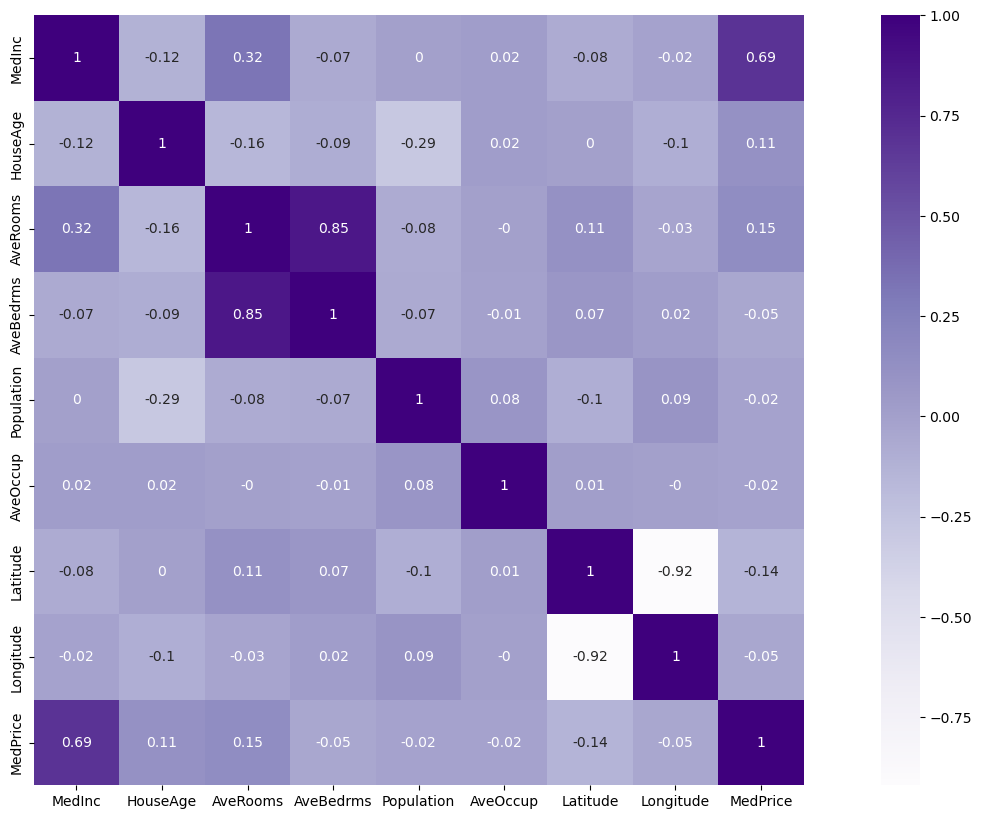

In [26]:
# Plot de correlação dos atributos com a variável target
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
#Quanto mais próximo à 1, mais correlacionados estão as duas features. Logo, são mais importantes.
correlation_matrix = dados_treino.corr().round(2)
plt.figure(figsize = (20,10))
sns.heatmap(data = correlation_matrix, square = True, annot = True, cmap = 'Purples') 

In [27]:
# Seleciona recursos de alta correlação
selected_feature_set = ['MedInc', 'AveRooms']  
sub_dados_treino = dados_treino[ selected_feature_set + ['MedPrice']] 

# Extrai os novos recursos de treinamento
X_treino = sub_dados_treino.drop(['MedPrice'], axis = 1)

# Seleciona os mesmos conjuntos de recursos para dados de teste
X_teste = X_teste[selected_feature_set]

In [28]:
X_treino.head()

,MedInc,AveRooms
7061,4.13,5.88
14689,2.86,4.40
17323,4.20,5.62
10056,3.11,5.87
15750,3.31,4.80


In [25]:
X_teste.head()

,MedInc,AveRooms
20046,1.68,4.19
3024,2.53,5.04
15663,3.48,3.98
20484,5.74,6.16
9814,3.73,5.49


## Modelagem 1

In [30]:
# Cria o modelo
linear_regressor = LinearRegression()

# Treina o modelo
linear_regressor.fit(X_treino, y_treino)

# Extrai os coeficientes
coeffcients = pd.DataFrame(linear_regressor.coef_, X_treino.columns, columns = ['Coefficient'])  

# Imprime o intercepto
print("Intercepto (coeficiente aprendido): {:.2f}".format(linear_regressor.intercept_))

print("\nCoeficientes das Variáveis:\n")
print(coeffcients)

Intercepto (coeficiente aprendido): 0.59

Coeficientes das Variáveis:

          Coefficient
MedInc           0.43
AveRooms        -0.04


## Avaliação do Modelo 1

In [31]:
# Previsões em treino e teste
y_pred_treino = linear_regressor.predict(X_treino)
y_pred_teste = linear_regressor.predict(X_teste)

In [32]:
# Print
print('MSE em Treino: {}'.format(mean_squared_error(y_treino, y_pred_treino)))
print('MSE em Teste: {:.2f}'.format(mean_squared_error(y_teste, y_pred_teste)))

MSE em Treino: 0.6977291798470149
MSE em Teste: 0.68


In [33]:
!pip install seaborn

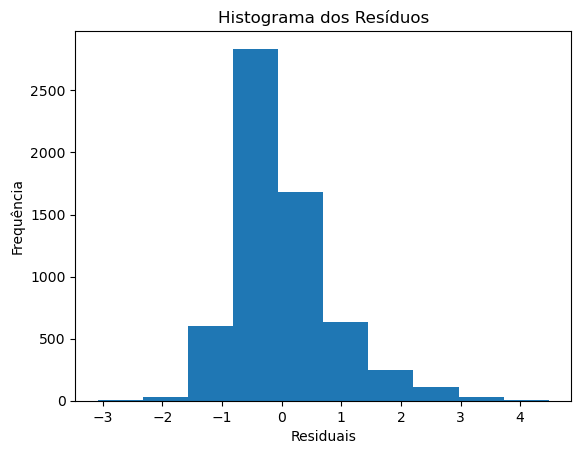

In [34]:
# Checando a normalidade dos erros
plt.hist(y_teste - y_pred_teste)
plt.title("Histograma dos Resíduos")
plt.xlabel("Residuais")
plt.ylabel("Frequência")
plt.show()

## Modelagem 2

In [47]:
!pip install GraphViz

In [41]:
# Cria o modelo
tree_regressor = DecisionTreeRegressor(max_depth = 3, random_state = 42)

# Treina o modelo
tree_regressor.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=3, random_state=42)

## Avaliação do Modelo 2

In [42]:
# Previsões em treino e teste
y_pred_treino = tree_regressor.predict(X_treino)
y_pred_teste = tree_regressor.predict(X_teste)

In [43]:
# Print
print('MSE em Treino: {:.2f}'.format(mean_squared_error(y_treino, y_pred_treino)))
print('MSE em Teste: {:.2f}'.format(mean_squared_error(y_teste, y_pred_teste)))

MSE em Treino: 0.68
MSE em Teste: 0.70


In [44]:
# Visualizando o modelo
dot_data = StringIO()
tree.export_graphviz(tree_regressor, 
                     out_file = dot_data, 
                     class_names = ['MedPrice'], 
                     feature_names = selected_feature_set,
                     filled = True, 
                     rounded = True, 
                     special_characters  = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

Image(graph.create_png())

InvocationException: GraphViz's executables not found

## Otimização de Hiperparâmetros

In [48]:
# Validação Cruzada
kf = KFold(n_splits = 5) 

cv_sets = []

for train_index, test_index in kf.split(X_treino):
    cv_sets.append((X_treino.iloc[train_index], 
                    y_treino.iloc[train_index], 
                    X_treino.iloc[test_index],
                    y_treino.iloc[test_index])) 

In [37]:
# Range de valores para o hiperparâmetro max_depths
max_depths = list(range(1, 11))  

In [38]:
# Loop de CV
for max_depth in max_depths:
    cv_results = []
    regressor = DecisionTreeRegressor(max_depth = max_depth, random_state = 42)    
    for x_tr, y_tr, x_te, y_te in cv_sets: 
        regressor.fit(x_tr, y_tr)
        cv_results.append(mean_squared_error(regressor.predict(x_te) , y_te))
    print('Tree depth: {}, MSE Médio: {}'.format(max_depth, np.mean(cv_results))) 

Tree depth: 1, MSE Médio: 0.9167053334390705
Tree depth: 2, MSE Médio: 0.7383634845663015
Tree depth: 3, MSE Médio: 0.68854467373395
Tree depth: 4, MSE Médio: 0.6388802215441052
Tree depth: 5, MSE Médio: 0.6229559075742178
Tree depth: 6, MSE Médio: 0.6181574550660847
Tree depth: 7, MSE Médio: 0.6315191091236836
Tree depth: 8, MSE Médio: 0.6531981343523263
Tree depth: 9, MSE Médio: 0.6778198281721838
Tree depth: 10, MSE Médio: 0.7023437729999482


## Modelagem 3

In [39]:
# Cria o modelo
tree_regressor = DecisionTreeRegressor(max_depth = 6, random_state = 42)

# Treina o modelo
tree_regressor.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=6, random_state=42)

## Avaliação do Modelo 3

In [40]:
# Previsões em treino e teste
y_pred_treino = tree_regressor.predict(X_treino)
y_pred_teste = tree_regressor.predict(X_teste)

In [41]:
# Print
print('MSE em Treino: {:.2f}'.format(mean_squared_error(y_treino, y_pred_treino)))
print('MSE em Teste: {:.2f}'.format(mean_squared_error(y_teste, y_pred_teste)))

MSE em Treino: 0.58
MSE em Teste: 0.64


# Terminando o Caderno

Todo esse projeto é feito de forma manual.